# Trabajo 1: Optimización heurística

Importamos las librerías que vamos a utilizar en el desarrollo del trabajo

In [ ]:
import time
from math import atan2, cos, radians, sin, sqrt

import numpy as np
import pygad
import pyswarms as ps
from geopy.extra.rate_limiter import RateLimiter
from geopy.geocoders import Nominatim
from pyswarms.utils.functions import single_obj
from scipy.optimize import differential_evolution

## Parte 1: Optimización Numérica

### Funciones de prueba

Considere las siguientes funciones de prueba:

##### 1. Función de Rosenbrock
La función de Rosenbrock, también conocida como función de valle, se define como:

$$
f(x, y) = (a - x)^2 + b(y - x^2)^2
$$

donde generalmente a = 1 y b = 100.

##### 2. Función de Rastrigin
La función de Rastrigin se expresa como:

$$
f(\mathbf{x}) = A n + \sum_{i=1}^{n} \left[ x_i^2 - A \cos(2 \pi x_i) \right]
$$

donde A = 10 y n es la dimensión del vector **x**.

##### 3. Función de Schwefel
La función de Schwefel se define como:

$$
f(\mathbf{x}) = 418.9829 n - \sum_{i=1}^{n} x_i \sin(\sqrt{|x_i|})
$$

donde n es la dimensión del vector **x**.

##### 4. Función de Griewank
La función de Griewank es:

$$
f(\mathbf{x}) = \frac{1}{4000} \sum_{i=1}^{n} x_i^2 - \prod_{i=1}^{n} \cos\left( \frac{x_i}{\sqrt{i}} \right) + 1
$$

donde n es la dimensión del vector **x**.

##### 5. Función Goldstein-Price
La función Goldstein-Price se expresa como:

$$
f(x, y) = \left[1 + (x + y + 1)^2 (19 - 14x + 3x^2 - 14y + 6xy + 3y^2)\right] \cdot \left[30 + (2x - 3y)^2 (18 - 32x + 12x^2 + 48y - 36xy + 27y^2)\right]
$$

##### 6. Función de las seis jorobas de camello
La función de las seis jorobas de camello se define como:

$$
f(x, y) = 4x^2 - 2.1x^4 + \frac{x^6}{3} + xy + 4y^2 - 4y^4
$$

#### 1. Escoja dos funciones de prueba

Las funciones que vamos a elegir son

1) Función de Rosenbrock

2) Función de las seis jorobas de camello

#### 2. Optimice las funciones en dos y tres dimensiones usando un método de descenso por gradiente con condición inicial aleatoria

##### Gradiente Descendiente

La función de Rosenbrock $$ f(x, y) $$ depende de dos variables, y el objetivo es minimizarla ajustando los valores de $x$ y $y$ en cada iteración. Las actualizaciones para $x$ y $y$ son las siguientes:

$$
x_{\text{new}} = x_{\text{current}} - \eta \frac{\partial f}{\partial x}
$$

$$
y_{\text{new}} = y_{\text{current}} - \eta \frac{\partial f}{\partial y}
$$

donde:
- $\frac{\partial f}{\partial x}$ y $ \frac{\partial f}{\partial y} $ son las derivadas parciales de la función de Rosenbrock $$ f(x, y) $$ con respecto a $x$ e $y$, respectivamente.
- $\eta$ es la **tasa de aprendizaje**, que controla el tamaño del paso en la dirección opuesta al gradiente. 

En cada iteración, se calcula el gradiente en el punto actual $(x_{\text{current}}, y_{\text{current}})$, y luego se actualizan $x$ e $y$ usando las ecuaciones anteriores hasta que el algoritmo converge a un mínimo.

##### Función de Rosenbrock

Para optimizar la función utilizando el método de descenso por gradiente necesitamos calcular las derivadas parciales de la función.

Las derivadas parciales con respecto a $x$ e $y$ son:

**Derivada parcial con respecto a $x$**

$$
\frac{\partial f}{\partial x} = -2(a - x) - 4b x (y - x^2)
$$

**Derivada parcial con respecto $y$**

$$
\frac{\partial f}{\partial y} = 2b(y - x^2)
$$

Elecciones comunes para el valor de a y b, son 1 y 100 respectivamente, por lo que utilizando este valor las derivadas de la función quedan de la siguiente manera:

**Derivada parcial con respecto a $x$**

$$
\frac{\partial f}{\partial x} = -2(1 - x) - 400x(y - x^2)
$$

**Derivada parcial con respecto $y$**

$$
\frac{\partial f}{\partial y} = 200(y - x^2)
$$

El gradiente de la función de Rosenbrock esta conformado por estas derivadas parciales

$$\nabla \left(\frac{\partial f}{\partial x}, \frac{\partial f}{\partial y}\right)$$

In [ ]:
def rosenbrock_function(x, y):
    """
    Calculate the Rosenbrock function value.
    
    :param x: variable 1
    :param y: variable 2
    :return: value of the Rosenbrock function
    """
    return (1 - x)**2 + 100*(y - x**2)**2

def d_x_rosenbrock(x, y):
    """
    Calculate the partial derivative of the Rosenbrock function with respect to x.
    
    :param x: variable 1
    :param y: variable 2
    :return: gradient of the Rosenbrock function with respect to x
    """
    return -2*(1 - x) - 400*x*(y - x**2)

def d_y_rosenbrock(x, y):
    """
    Calculate the partial derivative of the Rosenbrock function with respect to y.
    
    :param x: variable 1
    :param y: variable 2
    :return: gradient of the Rosenbrock function with respect to y
    """
    return 200*(y - x**2)

def gradient_descent(x, y, lr, iterations):
    """
    Perform gradient descent to minimize the Rosenbrock function.
    
    :param x: initial value of variable 1
    :param y: initial value of variable 2
    :param lr: learning rate
    :param iterations: number of iterations
    :return: optimized values of x and y
    """
    for i in range(iterations):
        x_new = x - lr * d_x_rosenbrock(x, y)
        y_new = y - lr * d_y_rosenbrock(x, y)
        x, y = x_new, y_new
    return x, y

# Initialize variables
x, y = np.random.randn(), np.random.randn()

# Perform gradient descent
x_opt, y_opt = gradient_descent(x, y, lr=0.001, iterations=10000)

print(f"El valor óptimo de (x, y) es ({x_opt}, {y_opt})")

El valor óptimo de (x, y) es (0.9942735785611042, 0.9885569551287954)


##### Función de las seis jorobas de camello

In [22]:
def three_hump_camel(x, y):
    """
    Calculate the value of the three-hump camel function.
    
    :param x: variable 1
    :param y: variable 2
    :return: value of the three-hump camel function
    """
    return 2*x**2 - 1.05*x**4 + x**6/6 + x*y + y**2

def d_x_three_hump_camel(x, y):
    """
    Calculate the partial derivative of the three-hump camel function with respect to x.
    
    :param x: variable 1
    :param y: variable 2
    :return: gradient of the three-hump camel function with respect to x
    """
    return 4*x - 4.2*x**3 + x**5 + y

def d_y_three_hump_camel(x, y):
    """
    Calculate the partial derivative of the three-hump camel function with respect to y.
    
    :param x: variable 1
    :param y: variable 2
    :return: gradient of the three-hump camel function with respect to y
    """
    return x + 2*y

def gradient_descent(x, y, lr, iterations):
    """
    Perform gradient descent to minimize the three-hump camel function.
    
    :param x: initial value of variable 1
    :param y: initial value of variable 2
    :param lr: learning rate
    :param iterations: number of iterations
    :return: optimized values of x and y
    """
    for i in range(iterations):
        x_new = x - lr * d_x_three_hump_camel(x, y)
        y_new = y - lr * d_y_three_hump_camel(x, y)
        x, y = x_new, y_new
    return x, y

# Initialize variables
x, y = np.random.randn(), np.random.randn()

# Perform gradient descent
x_opt, y_opt = gradient_descent(x, y, lr=0.01, iterations=1000)

print(f"El valor óptimo de (x, y) es ({x_opt}, {y_opt})")

El valor óptimo de (x, y) es (-6.355813189780015e-08, 1.5344290402667993e-07)


2024-11-02 13:54:25,734 - matplotlib.legend - WARNING - No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Mejor solución encontrada: x = 1.006295950987175, y = 1.0123668646080917
Valor de la función de Rosenbrock en la mejor solución: 4.664435665669227e-05
Fitness de la mejor solución: 955.4343781055784


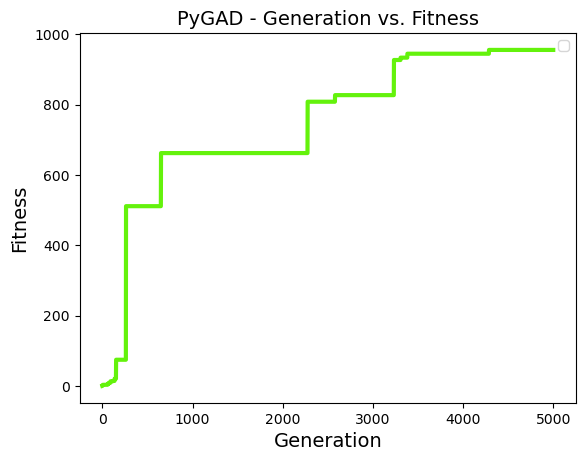

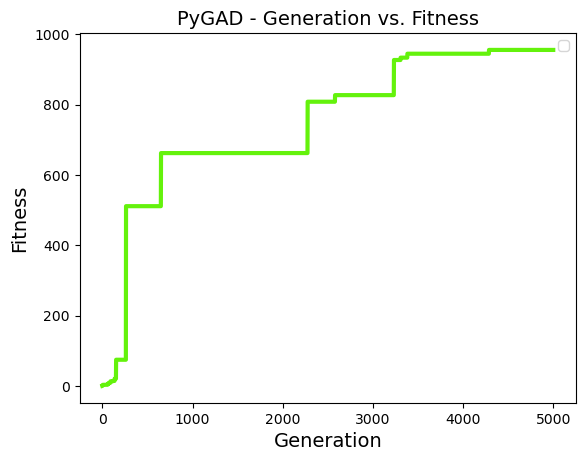

In [25]:
def fitness_func(ga_instance, solution, solution_idx):
    x, y = solution

    rosenbrock = (1-x)**2 + 100*(y-x**2)**2
    fitness = 1.0 / (rosenbrock + 0.001)

    return fitness

ga_instance = pygad.GA(num_generations=5000,
                       num_parents_mating=2,
                       fitness_func=fitness_func,
                       sol_per_pop=10,
                       num_genes=2,
                       gene_type=float,
                       init_range_low=-2,
                       init_range_high=2,
                       parent_selection_type="sss",
                       keep_parents=1,
                       crossover_type="single_point",
                       mutation_type="random",
                       mutation_percent_genes=10)

ga_instance.run()


solution, solution_fitness, solution_idx = ga_instance.best_solution()

x, y = solution
rosenbrock_value = (1 - x)**2 + 100 * (y - x**2)**2

print(f"Mejor solución encontrada: x = {x}, y = {y}")
print(f"Valor de la función de Rosenbrock en la mejor solución: {rosenbrock_value}")
print(f"Fitness de la mejor solución: {solution_fitness}")

# Graficar el progreso de la aptitud
ga_instance.plot_fitness()


In [ ]:
def rosenbrock(x):
    a = 1
    b = 100
    return (a - x[:, 0])**2 + b * (x[:, 1] - x[:, 0]**2)**2

bounds = (np.array([-5, -5]), np.array([5, 5]))  

options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}  
optimizer = ps.single.GlobalBestPSO(n_particles=500, dimensions=2, options=options, bounds=bounds)

cost, pos = optimizer.optimize(rosenbrock, iters=1000)

print(f"Valor óptimo encontrado: {cost}")
print(f"Posición óptima encontrada: {pos}")


2024-10-31 21:55:22,044 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0      
2024-10-31 21:55:23,343 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0, best pos: [1. 1.]


Valor óptimo encontrado: 0.0
Posición óptima encontrada: [1. 1.]


<Axes: title={'center': 'Cost History'}, xlabel='Iterations', ylabel='Cost'>

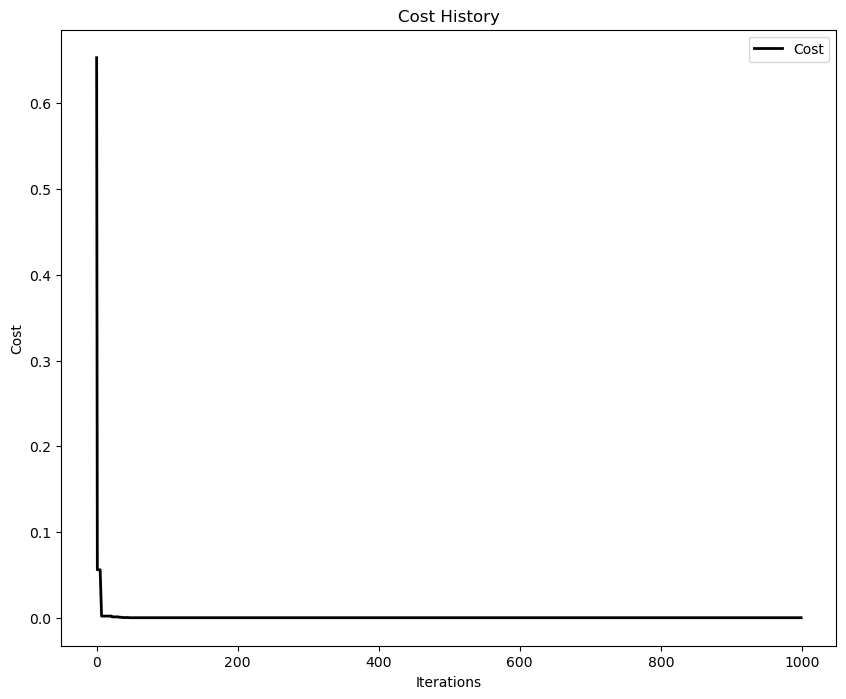

In [17]:
from pyswarms.utils.plotters import plot_cost_history

# Graficar el progreso de la optimización
plot_cost_history(optimizer.cost_history)

In [21]:
def rosenbrock(x):
    a = 1
    b = 100
    return (a - x[0])**2 + b * (x[1] - x[0]**2)**2

bounds = [(-5, 5), (-5, 5)]  

result = differential_evolution(rosenbrock, bounds, maxiter=10000, popsize=15, tol=1e-6)

print("Valor óptimo encontrado:", result.fun)
print("Posición óptima encontrada:", result.x)


Valor óptimo encontrado: 4.979684464207637e-30
Posición óptima encontrada: [1. 1.]


## Parte 2: optimización combinatoria

In [24]:
capitales_mexico = [
    "Aguascalientes", "Mexicali", "La Paz", "San Francisco de Campeche",
    "Tuxtla Gutiérrez", "Chihuahua", "Ciudad de México", "Saltillo",
    "Colima", "Durango", "Guanajuato", "Chilpancingo", "Pachuca",
    "Guadalajara", "Toluca", "Morelia", "Cuernavaca", "Tepic",
    "Monterrey", "Oaxaca de Juárez", "Puebla", "Santiago de Querétaro",
    "Chetumal", "San Luis Potosí", "Culiacán", "Hermosillo",
    "Villahermosa", "Ciudad Victoria", "Tlaxcala", "Xalapa",
    "Mérida", "Zacatecas"
]

# Inicializar el geolocalizador de Nominatim
geolocator = Nominatim(user_agent="mexico_capitales")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

# Diccionario para almacenar las coordenadas
capitales_coordenadas = {}

# Obtener coordenadas para cada capital
for capital in capitales_mexico:
    location = geocode(f"{capital}, Mexico")
    if location:
        capitales_coordenadas[capital] = (location.latitude, location.longitude)
        print(f"{capital}: Latitud {location.latitude}, Longitud {location.longitude}")
    else:
        print(f"No se encontraron coordenadas para {capital}")
    time.sleep(0.5)  # Pausa para evitar sobrecargar la API

# Resultado final
print("\nCoordenadas de las capitales de los estados de México:")
for capital, coords in capitales_coordenadas.items():
    print(f"{capital}: {coords}")

Aguascalientes: Latitud 21.9942689, Longitud -102.3726689
Mexicali: Latitud 32.6405247, Longitud -115.474899
La Paz: Latitud 24.1619948, Longitud -110.3158532
San Francisco de Campeche: Latitud 19.8381215, Longitud -90.5198253
Tuxtla Gutiérrez: Latitud 16.753801, Longitud -93.115959
Chihuahua: Latitud 28.5000001, Longitud -106.0000001
Ciudad de México: Latitud 19.4326296, Longitud -99.1331785
Saltillo: Latitud 25.4230425, Longitud -100.9927509
Colima: Latitud 19.166667, Longitud -104.0
Durango: Latitud 24.833333, Longitud -104.833333
Guanajuato: Latitud 20.9876996, Longitud -101.0
Chilpancingo: Latitud 17.5542149, Longitud -99.5048416
Pachuca: Latitud 20.1165413, Longitud -98.7413535
Guadalajara: Latitud 20.6720375, Longitud -103.338396
Toluca: Latitud 19.292545, Longitud -99.6569007
Morelia: Latitud 19.7027116, Longitud -101.1923818
Cuernavaca: Latitud 18.9218274, Longitud -99.2342282
Tepic: Latitud 21.5119156, Longitud -104.8915889
Monterrey: Latitud 25.6802019, Longitud -100.315258


In [28]:
def haversine(coord1, coord2):
    R = 6371  # Radio de la Tierra en km
    lat1, lon1 = radians(coord1[0]), radians(coord1[1])
    lat2, lon2 = radians(coord2[0]), radians(coord2[1])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c

# Lista de capitales en el orden del diccionario
capitales = list(capitales_coordenadas.keys())
num_capitales = len(capitales)

# Crear una matriz de distancias vacía
distancias = np.zeros((num_capitales, num_capitales))

# Llenar la matriz de distancias
for i in range(num_capitales):
    for j in range(i + 1, num_capitales):
        coord1 = capitales_coordenadas[capitales[i]]
        coord2 = capitales_coordenadas[capitales[j]]
        dist = haversine(coord1, coord2)
        distancias[i][j] = dist
        distancias[j][i] = dist  # La matriz es simétrica

# Mostrar la matriz de distancias
print("Matriz de distancias entre capitales:")
print(distancias)

Matriz de distancias entre capitales:
[[   0.         1751.19830226  847.38702132 ...  629.56274199
  1323.69487473  134.92505269]
 [1751.19830226    0.         1068.89492711 ... 2350.64090542
  2864.26933186 1624.64980397]
 [ 847.38702132 1068.89492711    0.         ... 1474.51965731
  2152.10881373  761.34075015]
 ...
 [ 629.56274199 2350.64090542 1474.51965731 ...    0.
   776.85325582  737.81901864]
 [1323.69487473 2864.26933186 2152.10881373 ...  776.85325582
     0.         1391.56229719]
 [ 134.92505269 1624.64980397  761.34075015 ...  737.81901864
  1391.56229719    0.        ]]


In [46]:
import numpy as np
import random
from math import radians, sin, cos, sqrt, atan2

# Supongamos que 'capitales_coordenadas' es un diccionario definido previamente
# con los nombres de las capitales como claves y sus coordenadas (latitud, longitud) como valores.

# Función para calcular la distancia entre dos coordenadas geográficas
def haversine(coord1, coord2):
    R = 6371  # Radio de la Tierra en km
    lat1, lon1 = radians(coord1[0]), radians(coord1[1])
    lat2, lon2 = radians(coord2[0]), radians(coord2[1])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c

# Lista de capitales y número de capitales
capitales = list(capitales_coordenadas.keys())
num_capitales = len(capitales)

# Crear y llenar la matriz de distancias
distancias = np.zeros((num_capitales, num_capitales))
for i in range(num_capitales):
    for j in range(i + 1, num_capitales):
        coord1 = capitales_coordenadas[capitales[i]]
        coord2 = capitales_coordenadas[capitales[j]]
        dist = haversine(coord1, coord2)
        distancias[i][j] = dist
        distancias[j][i] = dist  # La matriz es simétrica

# Parámetros del algoritmo genético
population_size = 100
num_generations = 1000
mutation_rate = 0.02
tournament_size = 5

# Función para inicializar la población
def initialize_population(pop_size, num_cities):
    population = []
    for _ in range(pop_size):
        individual = list(range(num_cities))
        random.shuffle(individual)
        population.append(individual)
    return population

# Función para calcular la aptitud (fitness) de un individuo
def calculate_fitness(individual, distance_matrix):
    total_distance = 0
    for i in range(len(individual) - 1):
        city_a = individual[i]
        city_b = individual[i + 1]
        total_distance += distance_matrix[city_a][city_b]
    # Añadir la distancia de regreso al punto de inicio para completar el ciclo
    total_distance += distance_matrix[individual[-1]][individual[0]]
    return total_distance

# Función de selección por torneo
def tournament_selection(population, fitnesses, tournament_size):
    selected = []
    for _ in range(len(population)):
        tournament = random.sample(list(zip(population, fitnesses)), tournament_size)
        tournament.sort(key=lambda x: x[1])
        selected.append(tournament[0][0])  # Agregar el individuo con mejor aptitud
    return selected

# Operador de cruce (Order Crossover - OX)
def crossover(parent1, parent2):
    size = len(parent1)
    child = [None] * size

    # Seleccionar dos puntos de cruce aleatorios
    start, end = sorted(random.sample(range(size), 2))

    # Copiar la porción del padre 1 al hijo
    child[start:end + 1] = parent1[start:end + 1]

    # Llenar los espacios vacíos con genes del padre 2
    p2_index = 0
    for i in range(size):
        if child[i] is None:
            while parent2[p2_index] in child:
                p2_index += 1
            child[i] = parent2[p2_index]
            p2_index += 1
    return child

# Operador de mutación (Swap Mutation)
def mutate(individual, mutation_rate):
    if random.random() < mutation_rate:
        i, j = random.sample(range(len(individual)), 2)
        # Intercambiar dos ciudades
        individual[i], individual[j] = individual[j], individual[i]
    return individual

# Inicializar la población
population = initialize_population(population_size, num_capitales)

# Algoritmo genético principal
for generation in range(num_generations):
    # Calcular la aptitud de cada individuo
    fitnesses = [calculate_fitness(individual, distancias) for individual in population]

    # Selección
    selected_population = tournament_selection(population, fitnesses, tournament_size)

    # Crear la siguiente generación
    next_generation = []
    for i in range(0, population_size, 2):
        parent1 = selected_population[i]
        parent2 = selected_population[(i + 1) % population_size]

        # Cruce
        child1 = crossover(parent1, parent2)
        child2 = crossover(parent2, parent1)

        # Mutación
        child1 = mutate(child1, mutation_rate)
        child2 = mutate(child2, mutation_rate)

        next_generation.extend([child1, child2])

    population = next_generation[:population_size]

    # Imprimir el mejor resultado cada 50 generaciones
    if generation % 50 == 0:
        best_fitness = min(fitnesses)
        print(f"Generación {generation}: Mejor distancia = {best_fitness:.2f} km")

# Después del algoritmo, encontrar y mostrar la mejor solución
fitnesses = [calculate_fitness(individual, distancias) for individual in population]
best_index = fitnesses.index(min(fitnesses))
best_individual = population[best_index]
best_distance = fitnesses[best_index]

print("\nMejor ruta encontrada:")
best_route = [capitales[i] for i in best_individual]
print(" -> ".join(best_route))
print(f"Distancia total: {best_distance:.2f} km")


Generación 0: Mejor distancia = 24135.62 km
Generación 50: Mejor distancia = 12930.07 km
Generación 100: Mejor distancia = 12194.85 km
Generación 150: Mejor distancia = 11724.53 km
Generación 200: Mejor distancia = 11401.86 km
Generación 250: Mejor distancia = 11309.29 km
Generación 300: Mejor distancia = 11309.29 km
Generación 350: Mejor distancia = 11309.29 km
Generación 400: Mejor distancia = 11207.90 km
Generación 450: Mejor distancia = 10858.31 km
Generación 500: Mejor distancia = 10858.31 km
Generación 550: Mejor distancia = 10858.31 km
Generación 600: Mejor distancia = 10858.31 km
Generación 650: Mejor distancia = 10858.31 km
Generación 700: Mejor distancia = 10858.31 km
Generación 750: Mejor distancia = 10858.31 km
Generación 800: Mejor distancia = 10858.31 km
Generación 850: Mejor distancia = 10821.15 km
Generación 900: Mejor distancia = 10821.15 km
Generación 950: Mejor distancia = 10821.15 km

Mejor ruta encontrada:
Ciudad Victoria -> Monterrey -> Saltillo -> Zacatecas -> Du

In [53]:
import numpy as np
import pygad
from math import radians, sin, cos, sqrt, atan2

# Definir el diccionario 'capitales_coordenadas' con las coordenadas de las 32 capitales
capitales_coordenadas = {
    'Aguascalientes': (21.8853, -102.2916),
    'Baja California': (32.6549, -115.4681),
    'Baja California Sur': (24.1426, -110.3128),
    'Campeche': (19.8301, -90.5349),
    'Coahuila': (25.4232, -101.0053),
    'Colima': (19.1223, -104.0072),
    'Chiapas': (16.7569, -93.1292),
    'Chihuahua': (28.6320, -106.0691),
    'Ciudad de México': (19.4326, -99.1332),
    'Durango': (24.0277, -104.6532),
    'Guanajuato': (21.0190, -101.2574),
    'Guerrero': (17.4392, -99.5451),
    'Hidalgo': (20.0911, -98.7624),
    'Jalisco': (20.6597, -103.3496),
    'Estado de México': (19.4969, -99.7233),
    'Michoacán': (19.5665, -101.7068),
    'Morelos': (18.6813, -99.1013),
    'Nayarit': (21.7514, -104.8455),
    'Nuevo León': (25.5922, -99.9962),
    'Oaxaca': (17.0732, -96.7266),
    'Puebla': (19.0414, -98.2063),
    'Querétaro': (20.5888, -100.3899),
    'Quintana Roo': (19.1817, -88.4791),
    'San Luis Potosí': (22.1565, -100.9855),
    'Sinaloa': (24.8091, -107.3940),
    'Sonora': (29.2972, -110.3309),
    'Tabasco': (17.8409, -92.6189),
    'Tamaulipas': (23.7369, -99.1411),
    'Tlaxcala': (19.3182, -98.2375),
    'Veracruz': (19.1738, -96.1342),
    'Yucatán': (20.7099, -89.0943),
    'Zacatecas': (22.7709, -102.5832)
}

# Función para calcular la distancia entre dos coordenadas geográficas
def haversine(coord1, coord2):
    R = 6371  # Radio de la Tierra en km
    lat1 = radians(coord1[0])
    lon1 = radians(coord1[1])
    lat2 = radians(coord2[0])
    lon2 = radians(coord2[1])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c

# Lista de capitales y número de capitales
capitales = list(capitales_coordenadas.keys())
num_capitales = len(capitales)

# Crear y llenar la matriz de distancias
distancias = np.zeros((num_capitales, num_capitales))
for i in range(num_capitales):
    for j in range(i + 1, num_capitales):
        coord1 = capitales_coordenadas[capitales[i]]
        coord2 = capitales_coordenadas[capitales[j]]
        dist = haversine(coord1, coord2)
        distancias[i][j] = dist
        distancias[j][i] = dist  # La matriz es simétrica

# Parámetros del algoritmo genético
sol_per_pop = 100    # Tamaño de la población
num_generations = 500
num_parents_mating = 50
mutation_percent = 5

# Definir la función de aptitud (fitness)
def fitness_func(ga_instance, solution, solution_idx):
    # La función de aptitud debe maximizarse en PyGAD, por lo que invertimos la distancia
    total_distance = 0
    for i in range(len(solution) - 1):
        city_a = int(solution[i])
        city_b = int(solution[i + 1])
        total_distance += distancias[city_a][city_b]
    # Añadir la distancia de regreso al punto de inicio para completar el ciclo
    total_distance += distancias[int(solution[-1])][int(solution[0])]
    fitness = 1.0 / total_distance
    return fitness

fitness_function = fitness_func

# Definir los parámetros de PyGAD
ga_instance = pygad.GA(
    num_generations=num_generations,
    num_parents_mating=num_parents_mating,
    fitness_func=fitness_function,
    sol_per_pop=sol_per_pop,
    num_genes=num_capitales,
    gene_type=int,
    init_range_low=0,
    init_range_high=num_capitales - 1,
    mutation_percent_genes=mutation_percent,
    gene_space=list(range(num_capitales)),
    allow_duplicate_genes=False,  # No permitir ciudades repetidas
    crossover_type="single_point",     # Cruce ordenado para problemas de permutación
    mutation_type="swap",         # Mutación por intercambio
)

# Ejecutar el algoritmo genético
ga_instance.run()

# Obtener la mejor solución
solution, solution_fitness, solution_idx = ga_instance.best_solution()

# Convertir índices a nombres de capitales
best_route = [capitales[int(gene)] for gene in solution]

# Calcular la distancia total de la mejor ruta
total_distance = 0
for i in range(len(solution) - 1):
    city_a = int(solution[i])
    city_b = int(solution[i + 1])
    total_distance += distancias[city_a][city_b]
total_distance += distancias[int(solution[-1])][int(solution[0])]  # Regreso al inicio

# Mostrar los resultados
print("\nMejor ruta encontrada:")
print(" -> ".join(best_route))
print(f"Distancia total: {total_distance:.2f} km")
print(f"Fitness de la mejor solución: {solution_fitness}")


c:\Users\57320\anaconda3\Lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")



Mejor ruta encontrada:
Nayarit -> Nuevo León -> Tamaulipas -> Aguascalientes -> Jalisco -> Colima -> Michoacán -> Querétaro -> Hidalgo -> Veracruz -> Quintana Roo -> Yucatán -> Campeche -> Baja California -> Sonora -> Baja California Sur -> Sinaloa -> Chihuahua -> Coahuila -> San Luis Potosí -> Guanajuato -> Estado de México -> Morelos -> Ciudad de México -> Tlaxcala -> Puebla -> Tabasco -> Chiapas -> Oaxaca -> Guerrero -> Zacatecas -> Durango
Distancia total: 12738.55 km
Fitness de la mejor solución: 7.850189359094364e-05


In [56]:
capitales_coordenadas = {
    'Aguascalientes': (21.8853, -102.2916),
    'Baja California': (32.6245, -115.4523),
    'Baja California Sur': (24.1426, -110.3128),
    'Campeche': (19.8301, -90.5349),
    'Coahuila': (25.4232, -101.0053),
    'Colima': (19.2452, -103.7250),
    'Chiapas': (16.7569, -93.1292),
    'Chihuahua': (28.6320, -106.0691),
    'Ciudad de México': (19.4326, -99.1332),
    'Durango': (24.0277, -104.6532),
    'Guanajuato': (21.0190, -101.2574),
    'Guerrero': (17.4392, -99.5451),
    'Hidalgo': (20.0911, -98.7624),
    'Jalisco': (20.6597, -103.3496),
    'Estado de México': (19.4969, -99.7233),
    'Michoacán': (19.5665, -101.7068),
    'Morelos': (18.6813, -99.1013),
    'Nayarit': (21.7514, -104.8455),
    'Nuevo León': (25.5922, -99.9962),
    'Oaxaca': (17.0732, -96.7266),
    'Puebla': (19.0414, -98.2063),
    'Querétaro': (20.5888, -100.3899),
    'Quintana Roo': (18.5000, -88.3000),
    'San Luis Potosí': (22.1565, -100.9855),
    'Sinaloa': (24.8091, -107.3940),
    'Sonora': (29.0892, -110.9613),
    'Tabasco': (17.8409, -92.6189),
    'Tamaulipas': (23.7369, -99.1411),
    'Tlaxcala': (19.3182, -98.2375),
    'Veracruz': (19.1738, -96.1342),
    'Yucatán': (20.7099, -89.0943),
    'Zacatecas': (22.7709, -102.5832)
}

# Función para calcular la distancia entre dos coordenadas geográficas
def haversine(coord1, coord2):
    R = 6371  # Radio de la Tierra en km
    lat1 = radians(coord1[0])
    lon1 = radians(coord1[1])
    lat2 = radians(coord2[0])
    lon2 = radians(coord2[1])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c

# Lista de capitales y número de capitales
capitales = list(capitales_coordenadas.keys())
num_capitales = len(capitales)

# Crear y llenar la matriz de distancias
distancias = np.zeros((num_capitales, num_capitales))
for i in range(num_capitales):
    for j in range(i + 1, num_capitales):
        coord1 = capitales_coordenadas[capitales[i]]
        coord2 = capitales_coordenadas[capitales[j]]
        dist = haversine(coord1, coord2)
        distancias[i][j] = dist
        distancias[j][i] = dist  # La matriz es simétrica

# Parámetros del algoritmo de Colonia de Hormigas
num_hormigas = 50
num_iteraciones = 100
alpha = 1          # Importancia de la feromona
beta = 5           # Importancia de la heurística (1/distancia)
rho = 0.1          # Tasa de evaporación de la feromona
Q = 100            # Cantidad de feromona depositada

# Inicializar la matriz de feromonas
feromonas = np.ones((num_capitales, num_capitales))

# Función para calcular la probabilidad de mover a la siguiente ciudad
def calcular_probabilidades(actual, no_visitadas, feromonas, distancias, alpha, beta):
    numeradores = []
    for ciudad in no_visitadas:
        tau = feromonas[actual][ciudad] ** alpha
        eta = (1.0 / distancias[actual][ciudad]) ** beta
        numeradores.append(tau * eta)
    denominador = sum(numeradores)
    probabilidades = [n / denominador for n in numeradores]
    return probabilidades

# Algoritmo principal
mejor_ruta = None
mejor_distancia = float('inf')

for iteracion in range(num_iteraciones):
    todas_rutas = []
    todas_distancias = []
    for hormiga in range(num_hormigas):
        ruta = []
        no_visitadas = list(range(num_capitales))
        actual = random.choice(no_visitadas)
        ruta.append(actual)
        no_visitadas.remove(actual)

        while no_visitadas:
            probabilidades = calcular_probabilidades(actual, no_visitadas, feromonas, distancias, alpha, beta)
            siguiente = random.choices(no_visitadas, weights=probabilidades, k=1)[0]
            ruta.append(siguiente)
            no_visitadas.remove(siguiente)
            actual = siguiente

        distancia_total = 0
        for i in range(len(ruta) - 1):
            distancia_total += distancias[ruta[i]][ruta[i + 1]]
        # Añadir la distancia de regreso al punto de inicio para completar el ciclo
        distancia_total += distancias[ruta[-1]][ruta[0]]

        todas_rutas.append(ruta)
        todas_distancias.append(distancia_total)

        if distancia_total < mejor_distancia:
            mejor_distancia = distancia_total
            mejor_ruta = ruta

    # Actualización de feromonas
    feromonas *= (1 - rho)  # Evaporación

    for ruta, distancia in zip(todas_rutas, todas_distancias):
        aporte_feromona = Q / distancia
        for i in range(len(ruta) - 1):
            feromonas[ruta[i]][ruta[i + 1]] += aporte_feromona
            feromonas[ruta[i + 1]][ruta[i]] += aporte_feromona  # Matriz simétrica
        # Añadir feromona para el regreso al inicio
        feromonas[ruta[-1]][ruta[0]] += aporte_feromona
        feromonas[ruta[0]][ruta[-1]] += aporte_feromona

    # Imprimir el mejor resultado cada 10 iteraciones
    if iteracion % 10 == 0:
        print(f"Iteración {iteracion}: Mejor distancia = {mejor_distancia:.2f} km")

# Mostrar la mejor ruta encontrada
print("\nMejor ruta encontrada:")
mejor_ruta_nombres = [capitales[i] for i in mejor_ruta]
print(" -> ".join(mejor_ruta_nombres))
print(f"Distancia total: {mejor_distancia:.2f} km")


Iteración 0: Mejor distancia = 9731.31 km
Iteración 10: Mejor distancia = 9117.36 km
Iteración 20: Mejor distancia = 9117.36 km
Iteración 30: Mejor distancia = 9053.47 km
Iteración 40: Mejor distancia = 9053.47 km
Iteración 50: Mejor distancia = 9053.47 km
Iteración 60: Mejor distancia = 9053.47 km
Iteración 70: Mejor distancia = 9053.47 km
Iteración 80: Mejor distancia = 9053.47 km
Iteración 90: Mejor distancia = 9053.47 km

Mejor ruta encontrada:
Baja California -> Sonora -> Baja California Sur -> Sinaloa -> Durango -> Nayarit -> Jalisco -> Colima -> Michoacán -> Guanajuato -> Aguascalientes -> Zacatecas -> San Luis Potosí -> Querétaro -> Estado de México -> Ciudad de México -> Hidalgo -> Tlaxcala -> Puebla -> Morelos -> Guerrero -> Oaxaca -> Veracruz -> Chiapas -> Tabasco -> Campeche -> Yucatán -> Quintana Roo -> Tamaulipas -> Nuevo León -> Coahuila -> Chihuahua
Distancia total: 9053.47 km
